## PROJECT :  IMAGE SEGMENTATION

In [6]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

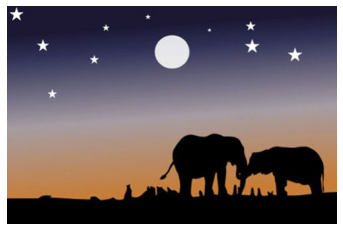

In [12]:
K_segments = 4

plt.axis('off')
org_image = cv2.imread('elephant.jpg')
org_image = cv2.cvtColor(org_image,cv2.COLOR_BGR2RGB)
plt.imshow(org_image)
plt.show()

In [14]:
print(org_image.shape)

(330, 500, 3)


In [18]:
img = org_image.reshape((330*500,3))

In [19]:
print(img.shape,org_image.shape)

(165000, 3) (330, 500, 3)


In [23]:
kmeans = KMeans(n_clusters = K_segments)
kmeans.fit(img)

KMeans(n_clusters=4)

In [29]:
labels = kmeans.labels_
centers = kmeans.cluster_centers_

In [32]:
centers = np.array(centers,dtype = 'uint8')
print(centers)

[[ 37  35  64]
 [174 145 128]
 [ 98  94 117]
 [  1   0   1]]


dominant colours : 


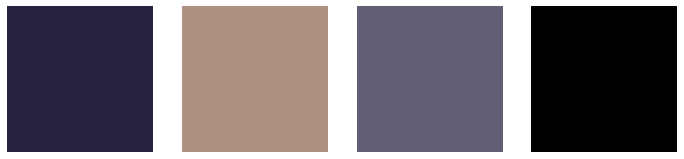

In [45]:
#printing the swathches of the dominant colours. :)
i = 1
plt.figure(0,figsize = (12,6))

colors = []
print('dominant colours : ')

for color in centers:
    
    plt.subplot(1,4,i)
    i += 1
    
    colors.append(color)
    
    x = np.zeros((200,200,3),dtype = 'uint8')
    x[:,:,:] = color
    plt.axis('off')
    plt.imshow(x)
    
plt.show()

### - Now, our task is to represent our image only in the form of dominant colours.

In [46]:
org_img = org_image
rec_img = np.zeros((330*500,3),dtype = 'uint8')

In [48]:
for i in range(labels.shape[0]):
    rec_img[i] = centers[labels[i]]

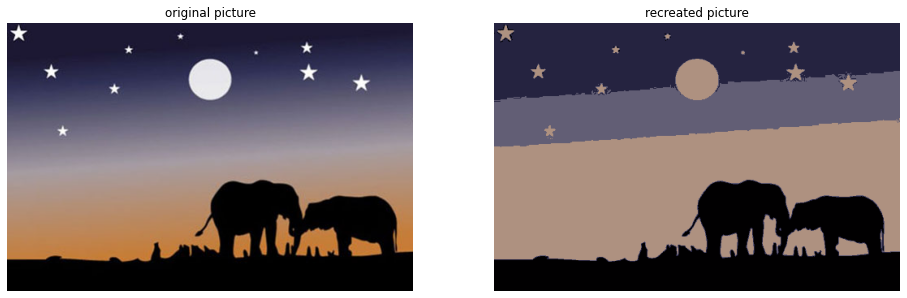

In [58]:
plt.figure(0,figsize = (16,8))
rec_img = rec_img.reshape((330,500,3))

for i in range(2):
    
    plt.subplot(1,2,i+1)
    
    plt.axis('off')
    if(i==0):
        plt.title('original picture')
        plt.imshow(org_img)
    else:
        plt.title('recreated picture')
        plt.imshow(rec_img)
        
plt.show()

### I have segmented the above image in 4 dominant colours and the recreated image looks as above :)

## 2) Work 2 : Working on my own image

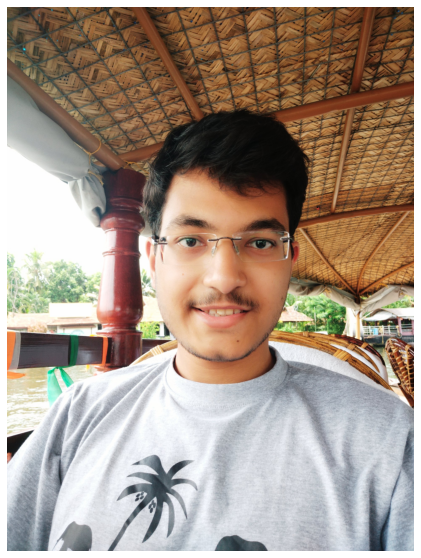

In [61]:
plt.figure(figsize = (10,10))
plt.axis('off')
myimg = cv2.imread('myPic.jpg')
myimg = cv2.cvtColor(myimg,cv2.COLOR_BGR2RGB)
plt.imshow(myimg)
plt.show()

In [82]:
s = np.array(myimg.shape)
print(s[0]*s[1],s[2])
rimg = np.zeros((s[0]*s[1],s[2]))
print(rimg.shape)

5028480 3
(5028480, 3)


## let's perform image segmentation on this image. :)

In [105]:
def imageSegmentation(Oimg,n_colours):
    """
    Oimg : image that you want to recreate
    n_colours : numbers of colours you want to segment this picture in.
    
    print: 
        
        show of the Swatches of the n_colours which are dominant in your given image.
    
    return :
        
        Oimg : original image
        Rec_img : recreated image 
    """
    km = KMeans(n_clusters = n_colours)
    Shape = np.array(Oimg.shape)
    
    reshaped_img = Oimg.reshape((Shape[0]*Shape[1],Shape[2]))
    km.fit(reshaped_img)
    labels = km.labels_
    
    Centers = km.cluster_centers_
    Centers = np.array(Centers,dtype = 'uint8')
    print("Dominant Colours : ")
    #generate swatches of dominant colors.
    plt.figure(0,figsize = (12,6))
    i = 1
    for color in Centers:
        
        plt.subplot(1,n_colours,i)
        i += 1
        
        plt.axis('off')
        x = np.zeros((200,200,3),dtype = 'uint8')
        x[:,:,:] = color
        
        plt.imshow(x)
    
    plt.show()
    
    Rec_img = np.zeros((Shape[0]*Shape[1],3),dtype = 'uint8')
    
    
    for i in range(Shape[0]*Shape[1]):
        Rec_img[i] = Centers[labels[i]]
        
    Rec_img = Rec_img.reshape((Shape[0],Shape[1],Shape[2]))
    
    return Oimg,Rec_img

In [106]:
def Show(org,rec):
    plt.figure(0,figsize = (16,12))
    plt.axis('off')
    for i in range(2):
        plt.subplot(1,2,i+1)
        plt.axis('off')
        if(i==0):
            plt.title('ORIGINAL IMAGE')
            plt.imshow(org)
        else:
            plt.title('RECREATED IMAGE')
            plt.imshow(rec)

    plt.show()

Dominant Colours : 


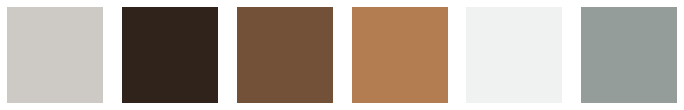

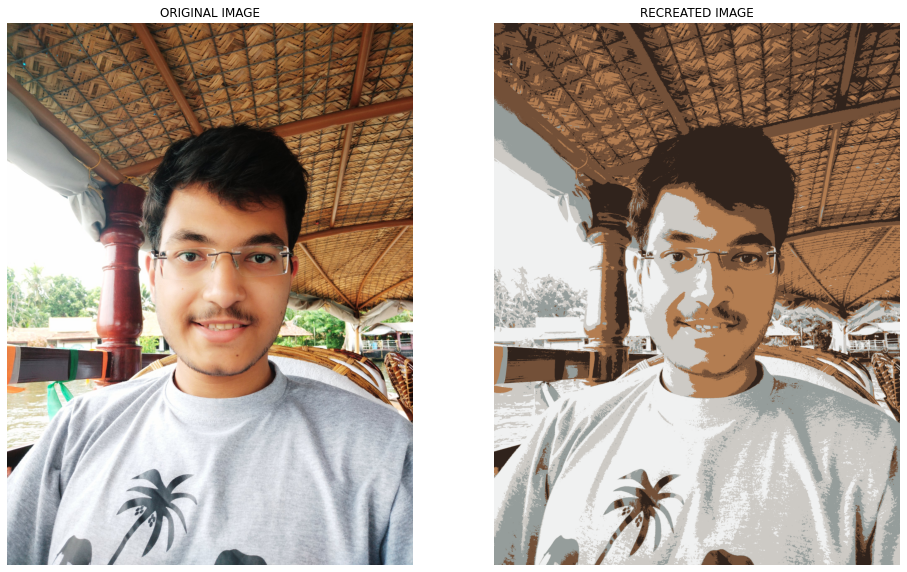

In [107]:
org,rec = imageSegmentation(myimg,6)
Show(org,rec)